In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Section 1: The Logistic Classification Function
A logistic model extends the logistic regression model into a classifier, meaning that now the logistic function can be used to classify continuous values into discretized categories

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# this dataset is loaded from the scikit-learn website
iris_data = load_iris()

# show descriptive information on the dataset
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
import pandas as pd

X, y = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names), pd.DataFrame(data=iris_data.target, columns=["iris_type"])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Each feature in our dataset contains continuous data, which is essential for appropriate regression calculation.

In [4]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


### We'll be using a module called train_test_split() that allows us to randomly partition our data. This will make more sense as we put it in practice.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# This final command is needed to restructure our y-data in order to effectively fit and predict the model on it.
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

### By comparing the predicted y-values with our true test y-values, we can ascertain our model's accuracy.

One way to do this is by manually iterating across our predicted y-values (y_pred) and true test y-values (y_test) and checking which values are equivalent.

However, we can do this by simply calling .score() on our machine learning model.

Keep in mind, two important arguments we send as parameters to our model are the solver and the multi_class parameters.

The parameter passed for the solver case is called the Limited-Memory BFGS, which is a popular optimization algorithm useful in machine learning.

The parameter passed for the multi_class case is called multinomial, which tells the model that the logistic regression expects discretized cases that are over two classes.

In [9]:
logreg = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial")
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Here, we've just instantiated our machine learning model (our logistic regression model) by assigning an empty model to a variable.

Then, we fitted the model to our training dataset. Here, it learns the approximate relationship between the X and y datasets.

Through learning the relationship between the X-y training data, we're hoping that the model can approximately determine the y-value given a new X-value.

In [11]:
y_pred = logreg.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

### By printing out and seeing the values across y_pred, we see what our model thinks should be the correct target labels for the corresponding X_test values.

A quick sanity check we can do to assure that our data is what we think it is is to call .shape on y_pred and y_test.

If the shape of both the predicted y-values array and the true test y-values array are consistent with one another, then we can assume that our model worked somewhat effectively.

We can also use the .predict_proba() command to grab the relative classification probabilities in an array, rather than the assigned classes themselves.

In [12]:
logreg.predict_proba(X_test)

array([[1.17924703e-04, 5.61479667e-02, 9.43734109e-01],
       [1.26288661e-02, 9.60454922e-01, 2.69162124e-02],
       [9.84397680e-01, 1.56022816e-02, 3.85650267e-08],
       [1.25180832e-06, 2.31530394e-02, 9.76845709e-01],
       [9.70234755e-01, 2.97650820e-02, 1.62609745e-07],
       [2.01669798e-06, 5.94453033e-03, 9.94053453e-01],
       [9.81899481e-01, 1.81004487e-02, 7.04478339e-08],
       [2.84241427e-03, 7.47089885e-01, 2.50067701e-01],
       [1.50915665e-03, 7.38524267e-01, 2.59966577e-01],
       [2.05287874e-02, 9.35891198e-01, 4.35800150e-02],
       [9.22436289e-05, 1.59475749e-01, 8.40432007e-01],
       [6.98627957e-03, 8.09989247e-01, 1.83024474e-01],
       [4.08220400e-03, 7.93602802e-01, 2.02314994e-01],
       [3.05681845e-03, 7.60910824e-01, 2.36032358e-01],
       [3.87699846e-03, 7.10277106e-01, 2.85845895e-01],
       [9.82815573e-01, 1.71843701e-02, 5.65491187e-08],
       [6.72901329e-03, 7.56465383e-01, 2.36805604e-01],
       [1.14291723e-02, 8.45111

### The next step is to simply determine the model's accuracy.

We can do this by calling .score() on our model and sending it our test data.

One common mistake many people make is to send y_pred rather than X_test as the first argument to the scoring method.

In this case, since we have three explicit class labels, we technically have a 33.33% baseline probability to correctly assign any label.

In [16]:
logreg.score(X_test, y_test) * 100

97.36842105263158

# Section 2: Support Vector Machine Classifiers

We'll be looking at the Support Vector Machine.

So far, we've only been playing with the Iris dataset in SciKit-Learn. We'll continue with using it to convey why SVMs are so powerful.

In [26]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

You're probably wondering why we import the model SVC() and why not SVM()?

Support Vector Machines are an entire subgroup of machine learning models used for much more than data classification. So for our intents and purposes, we want to specify that we only want to do data classification with our data.

Hence, why we import our Support Vector Machine Classifier Algorithm, or our SVC().

In [27]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
X, y = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names), pd.DataFrame(data=iris_data.target, columns=["iris_type"])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


Data still looks good! Inclusive integer data ranging between 0 and 2 for each of the Iris classes.

Let's recall that we can use train_test_split() to adequately and randomly segment our X and y data into partitions that we can use for improved model testing and fitness estimation.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

Our SVM takes a few key arguments that we call hyperparameters that allow us to grossly and finely tune our model to fit our data best.

The hyperparameters we'll concern ourselves with today include: - kernel: ("linear", "rbf")
Changes the linear transformation function to fit around our data (decision boundary function).


C: (0, inf)
Controls trade-off between smooth decision boundary and minimizing training misclassification.

gamma: (0, inf)
Kernel coefficient; controls 'fitness' of model to training data.

The most important hyperparameter to understand here is our kernel argument, which basically tells the SVM how to partition our data.

In this case, we tell it to split our classes using linear functions, which we often call lines.

In [33]:
svc = SVC(kernel="linear", C=1.0, gamma="auto")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_pred = svc.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Let's get some accuracy scores using the .score() method.

In [35]:
svc.score(X_test, y_test)

0.9736842105263158

By the way, in case you're curious about what the SVM is doing under the hood... well, it's easier to simply show you!

Using the power of MatPlotLib, we can visualize the partition lines (boundary functions) that our classifier is generating.

You certainly don't have to know how to write functions like the following - simply run the following function to see the visualized boundary functions!

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

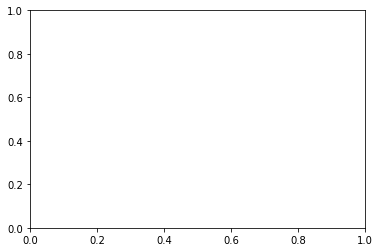

In [41]:
def svc_visualized(iris_data, kernel="linear", C=1.0, gamma="auto"):
    X, y = iris_data.data, iris_data.target

    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = (x_max / x_min) / 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

svc_visualized(iris_data)

# Section 3: The k-Nearest Neighbors Algorithm

The k-Nearest Neighbors algorithm allows you to create your decision boundary for classification based on a simple criterion: how many of my neighbors share my classification?

Points that are nearer to data values with differing classes are similar to our support vectors (SVM), where they are weighed higher with creating our decision boundary.

In [17]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [18]:
wine_data = load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [19]:
X, y = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names), pd.DataFrame(data=wine_data.target, columns=["wine_quality_type"])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
y.head()

,wine_quality_type
0,0
1,0
2,0
3,0
4,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

### An important argument we can and should specify to our kNN classifier is the number of neighbors examined for every data point.

kNN looks at every data point at least once across our entire dataset, but it's up to us to say for each data point, how many k neighbors it cross-references.

It is imperative to use values for k that make relative sense with the scale of our data. Values over 1000 may not carry as much bearing on our data as values between 10 and 25, for instance.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 0 2 0 1 1 1]


### One last thing we can play with is seeing which accuracies work best for our model's fitness.

As always, we can do this through some clever MatPlotLib and Python programming implementation.

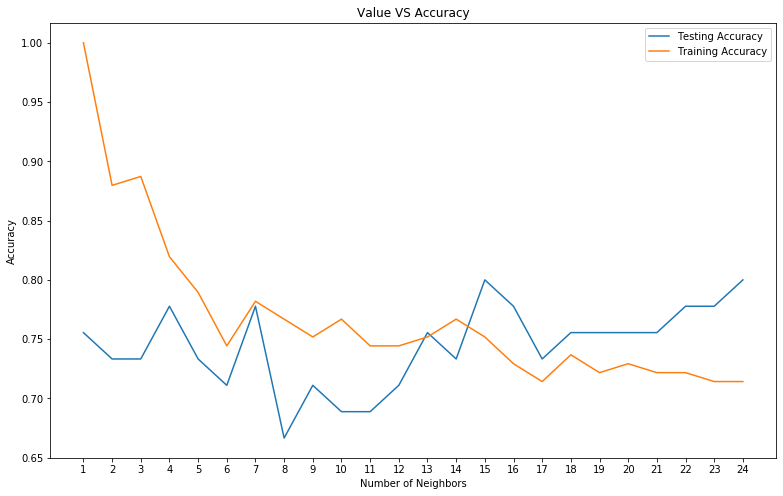

Best Accuracy is 0.8 with K=15


In [25]:
neighbors = np.arange(1, 25)
train_accuracy, test_accuracy = list(), list()

for iterator, kterator in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=kterator)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[13, 8])
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.savefig("knn_accuracies.png")
plt.show()

print("Best Accuracy is {} with K={}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

The visualization that you should see now adequately shows us our accuracy measurements across a range of k values from 1 to 25 for both our training and testing data segmentations.

In this case, we're trying to maximize our testing accuracy, so we want to grab the value of k where our blue line is at an absolute maximum.